In [1]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

from collections import defaultdict
import math
import pickle

In [2]:
reader=pd.read_csv('F://DM_DataFrames/Dump/feature.csv',delimiter="\t")

In [3]:
reader=reader.drop(reader.columns[[0]],axis=1)

In [4]:
reader.head()

,user_id,review_count,yelping_age,avg_rating,stdev,unique_business_count,y,is_train
0,-3i9bhfvrM3F1wsC9XIB8g,1,13.0,4.0,0.0,1,1,False
1,-GKEFg_92pp0q842clS_Jw,1,7.0,4.0,0.0,1,1,True
2,-3s52C4zL_DHRK0ULG6qtg,1,8.0,4.0,0.0,1,1,True
3,-dErbI4sHSkRz6oxjy9L3g,4,7.0,3.5,0.5,4,1,True
4,-NVuMUhYiQ3_VhpwBpYCfA,1,7.0,4.0,0.0,1,1,False


In [5]:
#topical_model=None
# with open("F://DM_Model_RF/model.pkl","rb") as f:
#     clf=pickle.load(f)
#print(reader[reader["y"]==0])
reader[reader["user_id"]=="N0durDai4PQJSkVEvO9QvQ"]

,user_id,review_count,yelping_age,avg_rating,stdev,unique_business_count,y,is_train
101,N0durDai4PQJSkVEvO9QvQ,1,11.0,2.0,0.0,1,1,False


In [6]:
train=reader[reader['is_train']==True]
test=reader[reader['is_train']==False]
clf=RandomForestClassifier(random_state=0,n_estimators=150,max_depth=None,max_leaf_nodes=100)
features=train.columns[1:-2]
features
clf.fit(train[features],train["y"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
#train.head()
test.head()
print(type(test["user_id"][0]))
print(test[test["user_id"]=="qYxn0CS7ZfV-k1fm8e6J9g"])

<class 'str'>
                      user_id  review_count  yelping_age  avg_rating  stdev  \
72837  qYxn0CS7ZfV-k1fm8e6J9g             1          6.0         2.0    0.0   

       unique_business_count  y  is_train  
72837                      1  0     False  


In [8]:
test_y=clf.predict(test[features])


In [9]:
#print(test_y[:10])
#print(len(test[test["y"]==1]))
#print(len(test[test["y"]==0]))
#print(len(test))
count=0
for i in test_y:
    if(i==1):
        count+=1
#print(count)
#print(len(test_y))
test.head()
#print(type(test))
#print(test["user_id"])
elite_predicted=[]
i=0
for index,row in test.iterrows():
    if(test_y[i]==1):
        elite_predicted.append(row[0])#elite_predicted.append(test["user_id"][index])
    i+=1
print(len(elite_predicted))
#print(i)

3673


In [10]:
count=0
count_1=0
count_actual_1=0
y_given=list(test["y"])
print(type(y_given))
for i in range(len(test)):
    if(y_given[i]==test_y[i]):
        count+=1
    if(y_given[i]==test_y[i] and test_y[i]==1):
        count_1+=1
    if(y_given[i]==1):
        count_actual_1+=1
print(count/len(test))
print(count_1/(count_actual_1))
print(count_1)
print(count_actual_1)
    

<class 'list'>
0.7645737453429761
0.4458145189301841
2567
5758


In [11]:
print(count_1)
fp=0
fn=0
for i in range(len(y_given)):
    if(y_given[i]==0 and test_y[i]==1):
        fp+=1
    if(y_given[i]==1 and test_y[i]==0):
        fn+=1
print(fp)
tp=count_1
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f_measure=2*(precision*recall)/(precision+recall)
print(precision)
print(recall)
print(f_measure)

2567
1106
0.6988837462564661
0.4458145189301841
0.5443749337291909


In [12]:
#Topical Authority

In [13]:
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
import scipy
import matplotlib.pyplot as plt
import csv

In [22]:
business=pd.read_json("F://Data mining project/YelpDataset/yelp_academic_dataset_business.json",lines=True)

In [14]:
bucket=pd.read_csv('F://output_bucket1.txt',delimiter="\t",header=None,names=["user_id","city","latitude","longitude",],encoding='latin-1')

C:\Users\SANTOSH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
print(business["latitude"][0]," ",business["longitude"][0])
print(len(bucket))
bucket.head()

51.0918130155   -114.031674872
5996996


,user_id,city,latitude,longitude
0,AdxhlxXSGjRsCQxG6ZjfTw,Las Vegas,36.1232,-115.169
1,SCIkk7Hjez5fqkbF2o-KYw,Montréal,45.4866,-73.5695
2,vHx9FtdWDTOcSLsj6_6WCw,Toronto,43.6637,-79.4178
3,LVZgk4gt_kT2E6UI7EHybw,Pickering,43.8356,-79.086
4,fajYvBnXcfk3RFQcOafA1Q,Wexford,40.6278,-80.0561


In [16]:
#print(len(bucket["user_id"]))
#print(len(bucket["user_id"].unique()))
print(bucket[bucket["user_id"]=="N0durDai4PQJSkVEvO9QvQ"])
users=bucket["user_id"].unique()
print(users[0])
print(len(bucket["city"].unique()))

                       user_id        city latitude longitude
453693  N0durDai4PQJSkVEvO9QvQ  Scottsdale   33.539  -111.866
AdxhlxXSGjRsCQxG6ZjfTw
1111


In [17]:
#business.head()
print(type(features))

<class 'pandas.core.indexes.base.Index'>


In [45]:
# features=business.columns[7:9]
# print(features)
#print(business[features])
len(elite_predicted)
i=0
for user in elite_predicted:
    if(i==10):
        break
    #print(user)
    i+=1
print(len(elite_predicted))
elite_predicted_temp=elite_predicted[:10]
print(elite_predicted_temp)

3673
['-3i9bhfvrM3F1wsC9XIB8g', '0mvmUHuGQL2kRRkX14CkTw', '46wwNRiBGIAJuPlk8TOP_g', '4X-1cZJ3V3KQLbijv5IwWA', '5QeFg1CIcgKl7CH7tir8eg', '7Q5aPLtDrWDhWPlFRkrYWw', 'AXlnMURHlXfQMQyQjS6Y8Q', 'BGzavA_ddMr-jGmhArv7fg', 'FnFVXfthkDNFy33a-ATBAQ', 'H0tfWQsGjEBuhXD4WUtpHw']


Density: 58
Density: 167


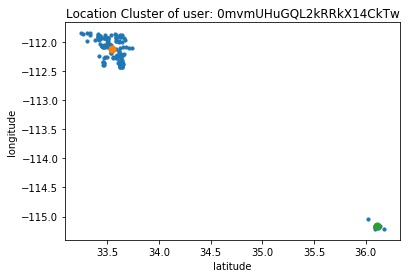

Location 36.1125319434   -115.168108273
User: 0mvmUHuGQL2kRRkX14CkTw


In [51]:
#Logic for iterating over all the users and finding the businesses associated with that user
user_location=[]
file=open("F://user_location.csv","w")
with file:
    for user in elite_predicted[1:2]:
        try:
            temp=bucket[bucket["user_id"]==user]
            features=temp.columns[2:]
            gmm=GaussianMixture(n_components=2,covariance_type="full").fit(temp[features])
            X=temp[features]
            #plt.scatter(X["latitude"], X["longitude"],s=10)
            location=[]
            max=0;
            for i in range(gmm.n_components):
                density = scipy.stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
                print("Density:",np.argmax(density))
                mean=gmm.means_[i]
                if(np.argmax(density)>max):
                    max=np.argmax(density)
                    location=mean
                #plt.scatter(gmm.means_[i][0], gmm.means_[i][1],s=50)
            #plt.xlabel("latitude")
            #plt.ylabel("longitude")
            #plt.title("Location Cluster of user: "+user)
            #plt.show()
            print("Location",location[0]," ",location[1])
            print("User:",user)
            user_location.append([user,location[0],location[1]])
            writer=csv.writer(file)
            writer.writerow([user,location[0],location[1]])
        except:
            print(user)


In [ ]:
#gmm=GMM(n_components=2).fit(business[features][1:][0])